In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import re
from wordcloud import WordCloud
import gensim.downloader as api
from sklearn.model_selection import train_test_split
import json

%matplotlib inline

# 1. Data Exploration and Visualization

In [4]:
df = pd.read_csv("datasets/dataset1.csv")
pd.set_option('max_colwidth', 800)
df

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology\r\nJanuary 2015 D..."
3,Data Science,"Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 mo..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription -"
...,...,...
957,Testing,"Computer Skills: â¢ Proficient in MS office (Word, Basic Excel, Power point) Strength: â¢ Hard working, Loyalty & Creativity â¢ Self-motivated, Responsible & Initiative â¢ Good people management skill & positive attitude. â¢ knowle

<Axes: xlabel='count', ylabel='Category'>

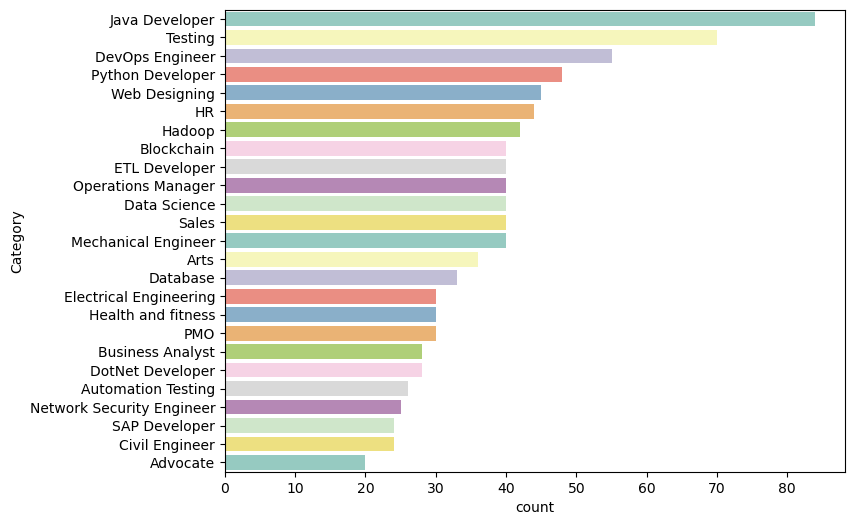

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order=df['Category'].value_counts().index)

In [6]:
others = ["Advocate", "Arts", "Health and fitness"]
business = ["Business Analyst", "HR", "PMO", "Sales", "Operations Manager"]
developers = ["DotNet Developer", "ETL Developer", "Java Developer", "Python Developer", "SAP Developer", "Web Designing"]
engineer = ["Civil Engineer", "Electrical Engineering", "Mechanical Engineer"]
backend = ["Blockchain", "Hadoop", "Database", "Data Science", "DevOps Engineer", "Network Security Engineer"]
QA = ["Automation Testing", "Testing"]


def groupByRole(row):
    job = row.Category
    
    if job in others:
        return "others"
    elif job in business:
        return "business"
    elif job in developers:
        return "developer"
    elif job in engineer:
        return "engineer"
    elif job in backend:
        return "backend"
    elif job in QA:
        return "QA"
    else:
        print(job)
        return "n/a"
    
df["Group"] = df.apply(groupByRole, axis="columns")
count = df.groupby("Group").Group.count()

count

Group
QA            96
backend      235
business     182
developer    269
engineer      94
others        86
Name: Group, dtype: int64

In [7]:
df["Resume"].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

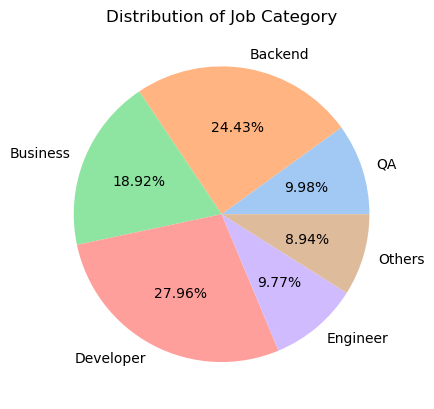

In [8]:
labels = ["QA", "Backend", "Business", "Developer", "Engineer", "Others"]

sns.set_palette('pastel')
pieChart = plt.pie(count, autopct='%.2f%%', labels=labels)
plt.title("Distribution of Job Category")
plt.show()

# 2. Cleaning the Data-Set

In [9]:
def lookup(target="", data=df, catg="Resume"):
    for line in data.loc[data[catg].str.contains(target, regex=False)].values:
        print(str(line) + '\n')

In [10]:
def cleanData(uncleanedText):
    uncleanedText = re.sub(r"\b(\d{3})[-.]?(\d{3})[-.]?(\d{4})\b", "", uncleanedText) # Removes Phone Number
    uncleanedText = re.sub(r"\b(\d{10})\b", "", uncleanedText) # Removes Phone Number P2
    uncleanedText = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b", "", uncleanedText) # Removes Email
    uncleanedText = re.sub("http[s]?\://\S+","",uncleanedText) # Removes Links
    uncleanedText = re.sub(r"(\r)|(\n)", " ", uncleanedText) # Removes Escape Characters \r and \n
    uncleanedText = re.sub(r"(\t)", "", uncleanedText) # Removes Escape Characters \t
    uncleanedText = re.sub("&", "and", uncleanedText) # Replaces & With and
    uncleanedText = re.sub("\s+", " ", uncleanedText)  # Remove Extra Whitespace
    uncleanedText = re.sub(r"[^\x00-\x7f]", r" ", uncleanedText) # Removes Non-Ascii Characters
    uncleanedText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), "", uncleanedText)  
    # remove punctuations
    return uncleanedText.lower() # Lowercase everything

df["Cleaned Resume"] = df.Resume.apply(cleanData)
df["Cleaned Resume"].iloc[0]

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm na  ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca and neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst and young llp skill details javascript exprience  24 months jquery exprience  24 months python exprience  24 monthscompany details company  ernst and young llp description  fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists 

# 3. Preparing Data For Training

## Vectorization of Dataset

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading NLTK Files for Language Processing
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/ethanrong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# Lemanization
lemmatizer = WordNetLemmatizer()

def lemmatizerFunction(row):
    returnString = ""
    for word in str(row).split():
        returnString += " " + lemmatizer.lemmatize(word)
    return returnString
df["Cleaned Resume"] = df["Cleaned Resume"].apply(lemmatizerFunction)

# Tokenize Words
stop_words = set(stopwords.words("english"))

def tokenizeFunction(row):
    return word_tokenize(row)
df["Cleaned Resume"] = df["Cleaned Resume"].apply(tokenizeFunction)

# Removing Stop Words
def removeStopWords(row):
    return np.array([word for word in row if word.casefold() not in stop_words])
df["Cleaned Resume"] = df["Cleaned Resume"].apply(removeStopWords)

df

,Category,Resume,Group,Cleaned Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",backend,"[skill, programming, language, python, panda, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, na, bayes, knn, random, forest, decision, tree, boosting, technique, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, net, database, visualization, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, cs, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understanding, deep, learningeducation, detail, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp, skill, detail, jav..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",backend,"[education, detail, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, detail, python, exprience, le, 1, year, month, statsmodels, exprience, 12, month, aws, exprience, le, 1, year, month, machine, learning, exprience, le, 1, year, month, sklearn, exprience, le, 1, year, month, scipy, exprience, le, 1, year, month, kera, exprience, le, 1, year, monthscompany, detail, company, matelabs, description, ml, platform, business, professional, dummy, enthusiast, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, deployed, auto, preprocessing, step, machine, learning, mainly, missing, value, treatment, outlier, detection, encoding, scaling, feature, selection, dimensionality, reduction, deployed, automated, classific..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Elect

In [13]:
from gensim.models import KeyedVectors

# Loading Model From Local Directory
try:
    model = KeyedVectors.load('wordEmbeding.d2v')
except FileNotFoundError:
    model = api.load("fasttext-wiki-news-subwords-300")
    model.save("wordEmbeding")

In [14]:
errorWords = {}

# Vectorizing Each Resume
def vectorizedResume(row):
    returnArray = np.array([])
    numberOfError = 0
    global errorWords
    
    for i, token in enumerate(row):
        try:
            returnArray = np.append(returnArray, np.array(model[token])).reshape(i+1-numberOfError, 300)
        except KeyError:
            numberOfError += 1
            
            if token in errorWords.keys() and token != "monthscompany" and \
            token != "month" and token != "company": # months company is one of the largest errors
                errorWords[token] += 1
            else:
                errorWords[token] = 1
    return returnArray.T  # Transpose To Ensure Each Word Lines Down [word1, word2.....]

df["Vectorized Resume"] = df["Cleaned Resume"].apply(vectorizedResume)
df["Vectorized Resume"].sample(2)

423    [[0.025155000388622284, -0.04773800075054169, 0.012551000341773033, -0.014573000371456146, 0.012551000341773033, -0.0008587400079704821, -0.03030100092291832, 0.011793999932706356, 0.010472999885678291, 0.004041200038045645, -0.011110000312328339, 0.0011747999815270305, 0.07181700319051743, 0.060472000390291214, -0.018988000229001045, -0.011110000312328339, 0.014516999945044518, -0.11450999975204468, 0.0524430014193058, -0.12621000409126282, -0.06946499645709991, 0.01853800006210804, 0.0524430014193058, -0.10762999951839447, -0.017858000472187996, -0.010324999690055847, -0.009800399653613567, -0.013768999837338924, -0.011110000312328339, 0.03728099912405014, 0.043602000921964645, 0.005611400119960308, -0.010036000050604343, 0.020075000822544098, -0.034366000443696976, -0.01025700010359...
695    [[0.0342320017516613, 0.01460499968379736, 0.02501400001347065, -0.014952999539673328, 0.008492499589920044, 0.05603799968957901, -0.005390599835664034, 0.00038189999759197235, -0.008921

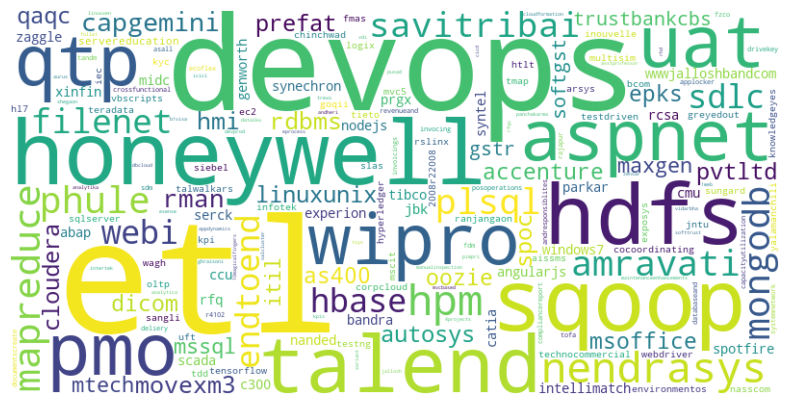

In [15]:
# Visualizing The Top Errors and Disgarding The Ones With Less Than 5 Hits
errorWords = {k: v for k, v in errorWords.items() if v > 5}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(errorWords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Clearly some technical words are being ignored by the vectorizer. Therefore, we must account for these in a later revision

In [16]:
# Finding Longest Resume
longestResume = 0
def findLongestResume(row):
    global longestResume
    global longestIndex
    
    if row.shape[1] > longestResume:
        longestResume = row.shape[1]
    return row
df["Vectorized Resume"].apply(findLongestResume)

# Adding Padding (Used Exclusively for CNN Method)
padding = int(longestResume)
def addPadding(row):
    global padding
    pad_width = ((0, 0), (0, padding-row.shape[1]))  
    return np.pad(row, pad_width, constant_values=0)

df["Padded Resume"] = df["Vectorized Resume"].apply(addPadding)
df["Padded Resume"].iloc[0].shape == df["Padded Resume"].iloc[3].shape, df["Padded Resume"].iloc[3].shape

(True, (300, 1440))

# 4. One Hot Encoding Each Category & Splitting Testing/Training¶

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# One Hot Encoding Results
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["Category"])
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

# Taking Data and Turning It Into A 
reshaped_data = df['Padded Resume'].apply(lambda x: np.reshape(x, (1, x.shape[0], x.shape[1])))
X = np.concatenate(reshaped_data.to_numpy(), axis=0)
y, X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_samples = X_train.shape[0]
train_features = X_train.shape[1] * X_train.shape[2]
reshapedX = X_train.transpose((0, 2, 1)).reshape((train_samples, train_features))
test_samples = X_test.shape[0]
test_features = X_test.shape[1] * X_test.shape[2]
reshapedTestX = X_test.transpose((0, 2, 1)).reshape((test_samples, test_features))
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(reshapedX, y_train)
knnPred = knn.predict(reshapedTestX)
print("Accuracy with k = 20:", accuracy_score(y_test, knnPred)*100, "%")

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 (962, 300, 1440))

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



# Splitting Training/Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

#plt.figure(1, 2, 1)


ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.

# 5. Building Model and Evaluating Performance

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Defining A Model
def buildModel():
    model = Sequential([
        Conv1D(32, kernel_size=5, activation="relu", input_shape=(300, 1440, 1)),
        MaxPooling2D(pool_size=5),

        Conv1D(32, kernel_size=5, activation="relu"),
        MaxPooling2D(pool_size=5),

        Flatten(),
        Dense(128, activation="relu"),
        Dense(25, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Building Model
model = buildModel()
model.fit(X_train, 
          y_train, 
          batch_size=32, 
          epochs=6, 
          validation_data=(X_test, y_test))

Epoch 1/6


2023-06-29 10:18:42.601501: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 22s 820ms/step - loss: 2.9143 - accuracy: 0.1821 - val_loss: 2.5971 - val_accuracy: 0.2798
Epoch 2/6
25/25 [==============================] - 21s 805ms/step - loss: 2.3160 - accuracy: 0.3173 - val_loss: 2.0793 - val_accuracy: 0.3679
Epoch 3/6
25/25 [==============================] - 20s 774ms/step - loss: 1.7542 - accuracy: 0.4811 - val_loss: 1.5909 - val_accuracy: 0.5337
Epoch 4/6
25/25 [==============================] - 20s 771ms/step - loss: 1.3079 - accuracy: 0.6060 - val_loss: 1.2554 - val_accuracy: 0.6632
Epoch 5/6
25/25 [==============================] - 20s 778ms/step - loss: 0.9353 - accuracy: 0.7516 - val_loss: 0.9570 - val_accuracy: 0.7668
Epoch 6/6
25/25 [==============================] - 21s 834ms/step - loss: 0.6923 - accuracy: 0.8244 - val_loss: 0.8474 - val_accuracy: 0.7617


In [14]:
# Visualizing Predictions
def visualizePred(pred, test):
    pred = np.sum(pred, axis=0)
    test = np.sum(y_test, axis=0)
    index = list(range(len(pred)))

    # Creating Residual Graph
    res = test - pred
    sns.barplot(x=index, y=res, color="r")
    plt.xlabel('Category')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

visualizePred(model.predict(X_test), y_test)

AttributeError: 'Model' object has no attribute 'predict'

In [20]:
from joblib import dump
model.save("model.h5")

# 6. Hyperparameter Tuning

In [21]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

# Performing Hyperparam
def buildModel(hp):   
    n_kernel = hp.Choice("kernel_size", [2, 5, 8, 10])
    n_layers = hp.Choice("n_layers", [2, 3, 4, 5])
    n_filters = hp.Int("n_filters", min_value=32, max_value=512)
    active_func = hp.Choice("activation", ["relu", "tanh"])
    optimizer = hp.Choice("optimizer", ["adam", "SGD"])
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
                                                  
    model = Sequential([
        layers.Conv1D(32, kernel_size=n_kernel, activation="relu", input_shape=(300, 1440, 1)),
        layers.MaxPooling2D(pool_size=5),

        layers.Conv1D(32, kernel_size=n_kernel, activation="relu"),
        layers.MaxPooling2D(pool_size=5),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(25, activation='softmax')
    ])
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

tuner = RandomSearch(
    buildModel,
    objective="val_accuracy",
    max_trials=30,
    executions_per_trial=3,
    directory="my_dir",
    project_name="helloWorld"
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
# Need to add more

INFO:tensorflow:Reloading Tuner from my_dir/helloWorld/tuner0.json


/var/folders/2j/0_wrpd3n1xs8vhzsjgsnfdhm0000gn/T/ipykernel_2600/966227619.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch



Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
8                 |5                 |kernel_size
3                 |3                 |n_layers
388               |327               |n_filters
relu              |tanh              |activation
adam              |SGD               |optimizer
0.00064352        |0.0024828         |learning_rate

Epoch 1/5
 3/25 [==>...........................] - ETA: 21s - loss: 3.1583 - accuracy: 0.1042

KeyboardInterrupt: 

# 7. Evaluation With External Data

## Let's Test the Model with an External Dataset. The pickled model was wrapped in an external model class which can be viewed in the same directory

In [51]:
from model import Model
import pandas as pd

dfTest = pd.read_csv("datasets/dataset2.csv")
dfTest.rename(columns={"Resume":"resume", "ID":"title"}, inplace=True)

dfTest.sample(5), dfTest.shape

(      title          Category  \
 1163   1164              Arts   
 350     351         Education   
 780     781  Food & Beverages   
 1149   1150           Banking   
 349     350         Education   
 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## To further test our model against external data, let's match categories that are similiar to the model to the external dataset and remove categories from the external dataset that are not in our model 

In [52]:
dfTest.Category.unique()

array(['HR', 'Designing', 'Managment', 'Information Technology',
       'Education', 'Advocate', 'Business Development',
       'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant',
       'Digital Media', 'Automobile', 'Food & Beverages', 'Finance',
       'Apparel', 'Engineering', 'Accountant', 'Building & Construction',
       'Architects', 'Public Relations', 'Banking', 'Arts', 'Aviation'],
      dtype=object)

In [53]:
irrelvantCatg = ["Education", "Architects", 
                 "Public Relations", "Agricultural", 
                 "Food & Beverages", "Apparel", "Aviation",
                 "BPO", "Banking", "Automobile", "Building & Construction"
                ] 
                # Categories with no close equivalents
    
dfTest = dfTest[~dfTest["Category"].isin(irrelvantCatg)]
dfTest = dfTest.reindex()
dfTest

,title,Category,resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\n\nApproachable innovator with a passion for Human Resources.\n\nSENIOR HUMAN RESOURCES PROFESSIONAL\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\ncompensation packages to senior level executives and employees.\n\nCORE COMPETENCIES\nBenefits Administration \xe2\x80\x93 Customer Service \xe2\x80\x93 Cost Control \xe2\x80\x93 Recruiting \xe2\x80\x93 Acquisition Management \xe2\x80..."
1,2,HR,"b'Name Surname\nAddress\nMobile No/Email\nPERSONAL PROFILE\nI am a self motivated individual who has a confident approach to people. I communicate\nwell with all levels of personnel and feel that I have a good listening ability which allows\nme to resolve problems quickly.\nI am enthusiastic about my role and enjoy working in HR, I like the fast paced\nenvironment which is always changing and I like to adapt to these changes quickly\nallowing others to also adapt quickly.\nI am organized by nature and like to ensure that I am up to date with my work. I enjoy\nnew challenges and I am always keen to learn new skills.\nEMPLOYMENT HISTORY\nDate to Date or To Date \xe2\x80\x93 HR Consultant \xe2\x80\x93 Where?\nIn my role as HR Consultant, I visit clients and provide HR advice and help reso..."
2,3,HR,"b'Anthony Brown\nHR Assistant\nAREAS OF EXPERTISE\n\nPERSONAL SUMMARY\n\nHR processes & systems\n\nA competent and organised individual who is able to work as part of a team and\nmanage several priorities at any one time. Anthony has a positive attitude,\nstrong work ethic, and a keen desire to learn and grow within a firm. He\npossesses superb communications skills, and always treats people with respect\nand according to their individual needs. As a dedicated professional he fully\nunderstands the importance of the HR department to any organisation, and\ntherefore aims to make any office he works in as effective and efficient as\npossible. He has extensive experience of working in commercially focussed\norganisations, and fully understands the pressures of achieving targets and\naccur..."
3,4,HR,"b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nCareer Objective\nTo pursue a growth oriented career with a progressive company that provides a scope to apply my\nknowledge and skills that would help me contribute my best to the organization.\nPersonal Skills\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\nEnjoy strong logical, analytical, communication, and interpersonal skills\nWork with Dedication and Determination\nHigh-Energy work ethic and commitment to client service.\nEasily adaptable to any new technology with minimum training.\nInterested in learning new things and in implementation.\nAbility to work individually, in-group.\n\nWork Experience\nTotal Experience 5years 5Months\nPresently working with Interra Systems India Pvt Ltd as Executive..."
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert in organizational effectiveness.\n\xef\x82\xb7Recognized consensus-builder among diverse groups.\n\xef\x82\xb7Innovative problem solver.\n\xef\x82\xb7Strategic partner.\n\xef\x82\xb7Effective executive coach.\n\xef\x82\xb7Facilitator of management/staff collaboration to achieve business goals.\n\xef\x82\xb7Watchdog against corporate legal liability and exposure.\nVALUE PROPOSITION\nBringing balance and simplicity to Human Resources processes, I create a competitive\nadvantage for the business that is reflected in the bottom line.\nProactive in anticipating problems and active in fixing things that break, I attract and retain a\nhighly skilled and motivated workforce by impleme

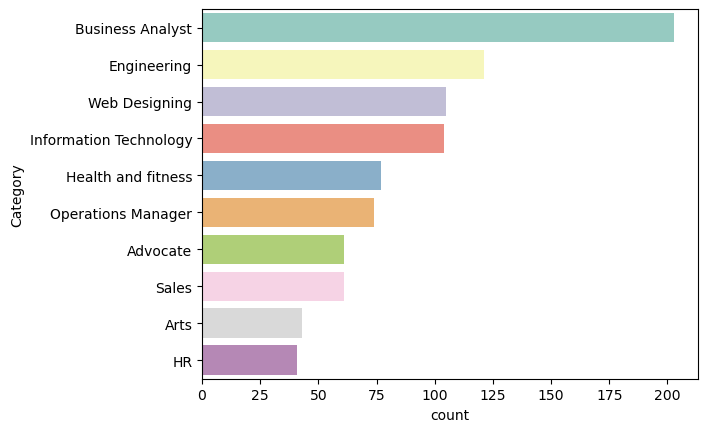

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the Remaining Test Cases
sns.countplot(y="Category" , palette="Set3", data=dfTest, order=dfTest['Category'].value_counts().index)
plt.show()

# Remaining Categories That Have to Be Manually Assigned
#set(dfTest.Category.unique()).difference(set(dfTest.Category.unique()).intersection(set(df.Category.unique())))

In [58]:
dfTest["Category"] = dfTest["Category"].replace({
    "Health & Fitness" : "Health and fitness",
    "Business Development" : "Business Analyst",
    "Finance" : "Business Analyst",
    "Accountant" : "Business Analyst",
    "Consultant" : "Business Analyst",
    "Banking" : "Business Analyst",
    "Managment" : "Operations Manager",
    "Designing" : "Web Designing",
    "Digital Media" : "Web Designing"
})

set(dfTest.Category.unique()).difference(set(dfTest.Category.unique()).intersection(set(df.Category.unique())))
dfTest  # For IT and Engineering, We Will Apply a Special Case that Will Try and Encompass All Dev. Roles
        # (Java Dev, Python Dev, ETL Dev, DotNet Dev, ) and Engineering Roles (Mech Eng, Electrical Eng, Mech Eng)

,title,Category,resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\n\nApproachable innovator with a passion for Human Resources.\n\nSENIOR HUMAN RESOURCES PROFESSIONAL\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\ncompensation packages to senior level executives and employees.\n\nCORE COMPETENCIES\nBenefits Administration \xe2\x80\x93 Customer Service \xe2\x80\x93 Cost Control \xe2\x80\x93 Recruiting \xe2\x80\x93 Acquisition Management \xe2\x80..."
1,2,HR,"b'Name Surname\nAddress\nMobile No/Email\nPERSONAL PROFILE\nI am a self motivated individual who has a confident approach to people. I communicate\nwell with all levels of personnel and feel that I have a good listening ability which allows\nme to resolve problems quickly.\nI am enthusiastic about my role and enjoy working in HR, I like the fast paced\nenvironment which is always changing and I like to adapt to these changes quickly\nallowing others to also adapt quickly.\nI am organized by nature and like to ensure that I am up to date with my work. I enjoy\nnew challenges and I am always keen to learn new skills.\nEMPLOYMENT HISTORY\nDate to Date or To Date \xe2\x80\x93 HR Consultant \xe2\x80\x93 Where?\nIn my role as HR Consultant, I visit clients and provide HR advice and help reso..."
2,3,HR,"b'Anthony Brown\nHR Assistant\nAREAS OF EXPERTISE\n\nPERSONAL SUMMARY\n\nHR processes & systems\n\nA competent and organised individual who is able to work as part of a team and\nmanage several priorities at any one time. Anthony has a positive attitude,\nstrong work ethic, and a keen desire to learn and grow within a firm. He\npossesses superb communications skills, and always treats people with respect\nand according to their individual needs. As a dedicated professional he fully\nunderstands the importance of the HR department to any organisation, and\ntherefore aims to make any office he works in as effective and efficient as\npossible. He has extensive experience of working in commercially focussed\norganisations, and fully understands the pressures of achieving targets and\naccur..."
3,4,HR,"b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nCareer Objective\nTo pursue a growth oriented career with a progressive company that provides a scope to apply my\nknowledge and skills that would help me contribute my best to the organization.\nPersonal Skills\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\xef\x82\xb7\n\nEnjoy strong logical, analytical, communication, and interpersonal skills\nWork with Dedication and Determination\nHigh-Energy work ethic and commitment to client service.\nEasily adaptable to any new technology with minimum training.\nInterested in learning new things and in implementation.\nAbility to work individually, in-group.\n\nWork Experience\nTotal Experience 5years 5Months\nPresently working with Interra Systems India Pvt Ltd as Executive..."
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert in organizational effectiveness.\n\xef\x82\xb7Recognized consensus-builder among diverse groups.\n\xef\x82\xb7Innovative problem solver.\n\xef\x82\xb7Strategic partner.\n\xef\x82\xb7Effective executive coach.\n\xef\x82\xb7Facilitator of management/staff collaboration to achieve business goals.\n\xef\x82\xb7Watchdog against corporate legal liability and exposure.\nVALUE PROPOSITION\nBringing balance and simplicity to Human Resources processes, I create a competitive\nadvantage for the business that is reflected in the bottom line.\nProactive in anticipating problems and active in fixing things that break, I attract and retain a\nhighly skilled and motivated workforce by impleme

## Let's Now Test Our External Dataset With Our Model

In [59]:
model = Model()
model.initializeResumes(df=dfTest.sample(500))
predictions = model.getPredictions()

# investigate weird error involving IndexError, ValueError and Tuple Index Out of Range???

/Users/ethanrong/Documents/GitHub/resumeML/backend/model
Error Resume Path Not Found


[nltk_data] Downloading package punkt to /Users/ethanrong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ethanrong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


downloaded version load
16/16 [==============================] - 4s 220ms/step


In [60]:
len(predictions)

500

In [61]:
total = 0
right = 0
top3 = 0

for name, pred in predictions.items():
    catg = dfTest[dfTest["title"] == name]["Category"]
    
    
    if not((catg == "Information Technology").iloc[0] or \
    (catg == "Engineering").iloc[0]):
        sorted_items = sorted(pred.items(), key=lambda x: x[1], reverse=True)
        top_three_keys = [key for key, _ in sorted_items[:3]]
        
        total += 1
        if (catg == top_three_keys[0]).iloc[0]:
            right += 1
        if (catg.isin(top_three_keys)).iloc[0]:
            top3 += 1
        
print(right/total)   
print(top3/total)

0.03674540682414698
0.09711286089238845


In [26]:
(dfTest[dfTest["title"] == name]["Category"] == "Engineering").iloc[0]

False

In [33]:
predictions

{82: {'Advocate': 0.04494703316595405,
  'Arts': 0.0047690089559182525,
  'Automation Testing': 14.085714519023895,
  'Blockchain': 0.33281620126217604,
  'Business Analyst': 7.677333801984787,
  'Civil Engineer': 0.06464177276939154,
  'Data Science': 0.007500300125684589,
  'Database': 7.882294058799744,
  'DevOps Engineer': 0.04451267304830253,
  'DotNet Developer': 0.06854335661046207,
  'ETL Developer': 0.07414326537400484,
  'Electrical Engineering': 1.4885845594108105,
  'HR': 0.0075240204751025885,
  'Hadoop': 3.3206500113010406,
  'Health and fitness': 5.963042750954628,
  'Java Developer': 0.5864406935870647,
  'Mechanical Engineer': 0.12438668636605144,
  'Network Security Engineer': 56.54067397117615,
  'Operations Manager': 0.002906392364820931,
  'PMO': 0.9405322372913361,
  'Python Developer': 0.011555942182894796,
  'SAP Developer': 0.01586566213518381,
  'Sales': 0.006813423533458263,
  'Testing': 0.6941935047507286,
  'Web Designing': 0.009610712731955573},
 465: {'Ad